In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/bitcoin_usd.csv')
df

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
7176632,1.756080e+09,113465.00,113482.00,113465.00,113482.00,0.397232
7176633,1.756080e+09,113436.00,113436.00,113387.00,113387.00,0.221852
7176634,1.756080e+09,113387.00,113404.00,113387.00,113404.00,2.683580
7176635,1.756080e+09,113409.00,113431.00,113397.00,113431.00,0.327762


In [4]:
# df['Timestamp'].head(10)
df.dtypes

,0
Timestamp,float64
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64


In [4]:
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
# df = df.set_index('Timestamp')
# display(df.head())

# df.index = pd.to_datetime(df.index)
# df = df.sort_index(ascending=False)
# df.head()
# df


In [5]:
#All columns null values

df.isnull().sum()

,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [6]:
df.dtypes

,0
Timestamp,float64
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64


In [7]:
# Convert Unix timestamp to proper datetime

df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df = df.set_index('Timestamp')

In [8]:
df.sort_index(ascending=True)

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...
2025-08-24 23:53:00,113465.00,113482.00,113465.00,113482.00,0.397232
2025-08-24 23:54:00,113436.00,113436.00,113387.00,113387.00,0.221852
2025-08-24 23:55:00,113387.00,113404.00,113387.00,113404.00,2.683580


In [11]:
#only getting the first row of each day
df = df[df.index.time == pd.to_datetime('00:00:00').time()]
df

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-02,4.84,4.84,4.84,4.84,0.000000
2012-01-03,5.00,5.00,5.00,5.00,0.000000
2012-01-04,5.29,5.29,5.29,5.29,0.000000
2012-01-05,5.57,5.57,5.57,5.57,0.000000
2012-01-06,6.42,6.42,6.42,6.42,0.000000
...,...,...,...,...,...
2025-08-20,112870.00,112928.00,112829.00,112928.00,0.339729
2025-08-21,114263.00,114264.00,114207.00,114207.00,0.545430
2025-08-22,112471.00,112512.00,112463.00,112512.00,2.692356


In [12]:
#Add percentage change column

df['pct_change'] = df['Close'].pct_change() * 100

/tmp/ipython-input-834917318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pct_change'] = df['Close'].pct_change() * 100


In [13]:
# adding 7 row average

df['avg_7_rows'] = df['Close'].rolling(window=7).mean()

/tmp/ipython-input-3292015640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_7_rows'] = df['Close'].rolling(window=7).mean()


In [14]:
# time_diffs = df.index.to_series().diff()

# # Display the results
# print("Time differences between consecutive rows:")
# print(time_diffs)

Time differences between consecutive rows:
Timestamp
2012-01-01 10:01:00               NaT
2012-01-01 10:02:00   0 days 00:01:00
2012-01-01 10:03:00   0 days 00:01:00
2012-01-01 10:04:00   0 days 00:01:00
2012-01-01 10:05:00   0 days 00:01:00
                            ...      
2025-08-24 23:53:00   0 days 00:01:00
2025-08-24 23:54:00   0 days 00:01:00
2025-08-24 23:55:00   0 days 00:01:00
2025-08-24 23:56:00   0 days 00:01:00
2025-08-24 23:57:00   0 days 00:01:00
Name: Timestamp, Length: 7176637, dtype: timedelta64[ns]


In [14]:
#removing rows having nan values

df.dropna(inplace=True)

/tmp/ipython-input-2433595606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [17]:
# 3. CHECK for mixed data scales
print("\n=== PRICE RANGE ANALYSIS ===")
print(f"Open range: {df['Open'].min()} to {df['Open'].max()}")
print(f"Close range: {df['Close'].min()} to {df['Close'].max()}")


=== PRICE RANGE ANALYSIS ===
Open range: 3.8 to 124479.0
Close range: 3.8 to 124482.0


In [15]:
# 5. CHECK time intervals
time_diffs = df.index.to_series().diff()
print(f"\n=== TIME INTERVALS ===")
print(f"Time range: {df.index.min()} to {df.index.max()}")
print(f"Total duration: {df.index.max() - df.index.min()}")
print(f"Number of intervals: {len(time_diffs)-1}")
print(f"Most common interval: {time_diffs.mode().iloc[0]}")
print(f"Shortest interval: {time_diffs.min()}")
print(f"Longest interval: {time_diffs.max()}")


=== TIME INTERVALS ===
Time range: 2012-01-08 00:00:00 to 2025-08-24 00:00:00
Total duration: 4977 days 00:00:00
Number of intervals: 4977
Most common interval: 1 days 00:00:00
Shortest interval: 1 days 00:00:00
Longest interval: 1 days 00:00:00


In [16]:
# Extract time components from the timestamp
df['numeric_timestamp'] = df.index.min().to_numpy().view('int64')

df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)

# For cyclical features (like hour, day of week), use sine/cosine transformation
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week']/7)

/tmp/ipython-input-3693221164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numeric_timestamp'] = df.index.min().to_numpy().view('int64')
/tmp/ipython-input-3693221164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/tmp/ipython-input-3693221164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [17]:
df.index.dayofweek.unique()

Index([6, 0, 1, 2, 3, 4, 5], dtype='int32', name='Timestamp')

In [18]:
df['min'] = df.index.min()
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['day_of_month'] = df.index.day

/tmp/ipython-input-1532700604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min'] = df.index.min()
/tmp/ipython-input-1532700604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/tmp/ipython-input-1532700604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [19]:
df.dtypes



,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64
pct_change,float64
avg_7_rows,float64
numeric_timestamp,int64
hour,int32
day_of_week,int32


In [24]:
print(df.index.min())

2012-01-01 10:07:00


In [25]:
print(df.index.min().to_numpy().view('int64'))

1325412420000000000


In [20]:
# df.drop(columns=['min'], inplace=True)
# df.sample()
df


,Open,High,Low,Close,Volume,pct_change,avg_7_rows,numeric_timestamp,hour,day_of_week,day_of_month,month,is_weekend,hour_sin,hour_cos,day_sin,day_cos,min
Timestamp,,,,,,,,,,,,,,,,,,
2012-01-08,6.80,6.80,6.80,6.80,0.000000,6.250000,5.760000,1325980800000000000,0,6,8,1,1,0.0,1.0,-0.781831,0.623490,2012-01-08
2012-01-09,6.90,6.90,6.90,6.90,0.000000,1.470588,6.054286,1325980800000000000,0,0,9,1,0,0.0,1.0,0.000000,1.000000,2012-01-08
2012-01-10,6.48,6.48,6.48,6.48,0.000000,-6.086957,6.265714,1325980800000000000,0,1,10,1,0,0.0,1.0,0.781831,0.623490,2012-01-08
2012-01-11,7.10,7.10,7.10,7.10,0.000000,9.567901,6.524286,1325980800000000000,0,2,11,1,0,0.0,1.0,0.974928,-0.222521,2012-01-08
2012-01-12,7.00,7.00,7.00,7.00,0.000000,-1.408451,6.728571,1325980800000000000,0,3,12,1,0,0.0,1.0,0.433884,-0.900969,2012-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-20,112870.00,112928.00,112829.00,112928.00,0.339729,-2.876015,117595.142857,1325980800000000000,0,2,20,8,0,0.0,1.0,0.974928,-0.222521,2012-01-08
2025-08-21,114263.00,114264.00,114207.00,114207.00,0.545430,1.132580,116289.714286,1325980800000000000,0,3,21,8,0,0.0,1.0,0.433884,-0.900969,2012-01-08
2025-08-22,112471.00,112512.00,112463.00,112512.00,2.692356,-1.484147,115457.142857,1325980800000000000,0,4,22,8,0,0.0,1.0,-0.433884,-0.900969,2012-01-08


In [21]:
#Removing duplicates
df.drop_duplicates(inplace=True)
# df

/tmp/ipython-input-2275772005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [22]:
# 2. Technical Indicators (add these)
df['returns'] = df['Close'].pct_change()
df['volatility_7'] = df['returns'].rolling(7).std()
df['MA_7'] = df['Close'].rolling(7).mean()
df['MA_24'] = df['Close'].rolling(24).mean()  # 24 hours
df['MA_7_24_ratio'] = df['MA_7'] / df['MA_24']
df['price_MA_deviation'] = (df['Close'] - df['MA_7']) / df['MA_7']

# 3. Volume Features
df['volume_MA_7'] = df['Volume'].rolling(7).mean()
df['volume_ratio'] = df['Volume'] / df['volume_MA_7']

# 4. Price Action Features
df['high_low_range'] = (df['High'] - df['Low']) / df['Open']
df['close_open_range'] = (df['Close'] - df['Open']) / df['Open']

# 5. Time Features (as mentioned above)
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
# Add the sine/cosine transformations too

/tmp/ipython-input-2843883246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['Close'].pct_change()
/tmp/ipython-input-2843883246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volatility_7'] = df['returns'].rolling(7).std()
/tmp/ipython-input-2843883246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [23]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
pct_change,0
avg_7_rows,0
numeric_timestamp,0
hour,0
day_of_week,0


In [24]:
df.dropna(inplace=True)

/tmp/ipython-input-1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [25]:
df

,Open,High,Low,Close,Volume,pct_change,avg_7_rows,numeric_timestamp,hour,day_of_week,...,returns,volatility_7,MA_7,MA_24,MA_7_24_ratio,price_MA_deviation,volume_MA_7,volume_ratio,high_low_range,close_open_range
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-04-26,4.89,4.89,4.89,4.89,18.018405,-4.305284,5.134286,1325980800000000000,0,3,...,-0.043053,0.019276,5.134286,4.974583,1.032104,-0.047579,2.574058,7.000000,0.000000,0.000000
2012-04-27,5.08,5.08,5.08,5.08,0.000000,3.885481,5.122857,1325980800000000000,0,4,...,0.038855,0.025421,5.122857,4.976667,1.029375,-0.008366,2.574058,0.000000,0.000000,0.000000
2012-04-28,5.04,5.04,5.04,5.04,0.000000,-0.787402,5.101429,1325980800000000000,0,5,...,-0.007874,0.025250,5.101429,4.980417,1.024298,-0.012041,2.574058,0.000000,0.000000,0.000000
2012-04-29,4.85,4.85,4.85,4.85,0.000000,-3.769841,5.042857,1325980800000000000,0,6,...,-0.037698,0.026741,5.042857,4.977917,1.013046,-0.038244,2.574058,0.000000,0.000000,0.000000
2012-04-30,4.91,4.91,4.91,4.91,0.000000,1.237113,5.004286,1325980800000000000,0,0,...,0.012371,0.028055,5.004286,4.978333,1.005213,-0.018841,2.574058,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-20,112870.00,112928.00,112829.00,112928.00,0.339729,-2.876015,117595.142857,1325980800000000000,0,2,...,-0.028760,0.021995,117595.142857,116870.583333,1.006200,-0.039688,1.538572,0.220808,0.000877,0.000514
2025-08-21,114263.00,114264.00,114207.00,114207.00,0.545430,1.132580,116289.714286,1325980800000000000,0,3,...,0.011326,0.018085,116289.714286,116653.250000,0.996884,-0.017910,1.376832,0.396149,0.000499,-0.000490
2025-08-22,112471.00,112512.00,112463.00,112512.00,2.692356,-1.484147,115457.142857,1325980800000000000,0,4,...,-0.014841,0.012892,115457.142857,116425.125000,0.991686,-0.025509,1.603425,1.679128,0.000436,0.000365


In [26]:
#defining label column

df['target'] = df['Close'].shift(-1)

/tmp/ipython-input-3278763993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['Close'].shift(-1)


In [27]:
df.dropna(inplace=True)


/tmp/ipython-input-658506679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [28]:
df

,Open,High,Low,Close,Volume,pct_change,avg_7_rows,numeric_timestamp,hour,day_of_week,...,volatility_7,MA_7,MA_24,MA_7_24_ratio,price_MA_deviation,volume_MA_7,volume_ratio,high_low_range,close_open_range,target
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-04-26,4.89,4.89,4.89,4.89,18.018405,-4.305284,5.134286,1325980800000000000,0,3,...,0.019276,5.134286,4.974583,1.032104,-0.047579,2.574058,7.000000,0.000000,0.000000,5.08
2012-04-27,5.08,5.08,5.08,5.08,0.000000,3.885481,5.122857,1325980800000000000,0,4,...,0.025421,5.122857,4.976667,1.029375,-0.008366,2.574058,0.000000,0.000000,0.000000,5.04
2012-04-28,5.04,5.04,5.04,5.04,0.000000,-0.787402,5.101429,1325980800000000000,0,5,...,0.025250,5.101429,4.980417,1.024298,-0.012041,2.574058,0.000000,0.000000,0.000000,4.85
2012-04-29,4.85,4.85,4.85,4.85,0.000000,-3.769841,5.042857,1325980800000000000,0,6,...,0.026741,5.042857,4.977917,1.013046,-0.038244,2.574058,0.000000,0.000000,0.000000,4.91
2012-04-30,4.91,4.91,4.91,4.91,0.000000,1.237113,5.004286,1325980800000000000,0,0,...,0.028055,5.004286,4.978333,1.005213,-0.018841,2.574058,0.000000,0.000000,0.000000,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-19,116295.00,116299.00,116272.00,116272.00,0.023376,-1.026575,118611.571429,1325980800000000000,0,1,...,0.020993,118611.571429,117082.125000,1.013063,-0.019725,1.593319,0.014671,0.000232,-0.000198,112928.00
2025-08-20,112870.00,112928.00,112829.00,112928.00,0.339729,-2.876015,117595.142857,1325980800000000000,0,2,...,0.021995,117595.142857,116870.583333,1.006200,-0.039688,1.538572,0.220808,0.000877,0.000514,114207.00
2025-08-21,114263.00,114264.00,114207.00,114207.00,0.545430,1.132580,116289.714286,1325980800000000000,0,3,...,0.018085,116289.714286,116653.250000,0.996884,-0.017910,1.376832,0.396149,0.000499,-0.000490,112512.00


In [29]:
#min and max values of all columns

for i in df.columns:
  print(i," => ",df[i].min()," , ",df[i].max())
  # print(df[i].max())

Open  =>  4.85  ,  123360.0
High  =>  4.85  ,  123365.0
Low  =>  4.85  ,  123307.0
Close  =>  4.85  ,  123345.0
Volume  =>  0.0  ,  274.14212125
pct_change  =>  -54.148148148148145  ,  32.54545454545455
avg_7_rows  =>  4.9628571428571435  ,  119217.28571428571
numeric_timestamp  =>  1325980800000000000  ,  1325980800000000000
hour  =>  0  ,  0
day_of_week  =>  0  ,  6
day_of_month  =>  1  ,  31
month  =>  1  ,  12
is_weekend  =>  0  ,  1
hour_sin  =>  0.0  ,  0.0
hour_cos  =>  1.0  ,  1.0
day_sin  =>  -0.9749279121818236  ,  0.9749279121818236
day_cos  =>  -0.9009688679024191  ,  1.0
min  =>  2012-01-08 00:00:00  ,  2012-01-08 00:00:00
returns  =>  -0.5414814814814815  ,  0.32545454545454544
volatility_7  =>  0.0024590526544526307  ,  0.33301344207687794
MA_7  =>  4.9628571428571435  ,  119217.28571428571
MA_24  =>  4.974583333333333  ,  117660.95833333333
MA_7_24_ratio  =>  0.7005434079515804  ,  1.6334244124679562
price_MA_deviation  =>  -0.5923302003067167  ,  0.41840527630870317
vo

In [31]:
# finding number of duplicate rows

df.duplicated().sum()

np.int64(0)

In [32]:
#scaling all columns
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Drop the 'min' column before scaling
df_to_scale = df.drop(columns=['min'])


# Scale all columns of the DataFrame
scaled_data = scaler.fit_transform(df_to_scale)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_to_scale.columns, index=df_to_scale.index)

# Display the head of the scaled DataFrame
display(df_scaled.head())

,Open,High,Low,Close,Volume,pct_change,avg_7_rows,numeric_timestamp,hour,day_of_week,...,volatility_7,MA_7,MA_24,MA_7_24_ratio,price_MA_deviation,volume_MA_7,volume_ratio,high_low_range,close_open_range,target
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-04-26,3.242670e-07,3.242538e-07,3.244063e-07,3.243064e-07,0.065727,0.574931,1.438010e-06,0.0,0.0,0.500000,...,0.050874,1.438010e-06,0.000000e+00,0.355415,0.538965,0.036711,1.0,0.0,0.226802,1.864762e-06
2012-04-27,1.864535e-06,1.864459e-06,1.865336e-06,1.864762e-06,0.000000,0.669411,1.342143e-06,0.0,0.0,0.666667,...,0.069466,1.342143e-06,1.770699e-08,0.352491,0.577762,0.036711,0.0,0.0,0.226802,1.540455e-06
2012-04-28,1.540268e-06,1.540206e-06,1.540930e-06,1.540455e-06,0.000000,0.615510,1.162392e-06,0.0,0.0,0.833333,...,0.068949,1.162392e-06,4.957957e-08,0.347048,0.574125,0.036711,0.0,0.0,0.226802,0.000000e+00
2012-04-29,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.581108,6.710716e-07,0.0,0.0,1.000000,...,0.073458,6.710716e-07,2.833118e-08,0.334986,0.548201,0.036711,0.0,0.0,0.226802,4.864596e-07
2012-04-30,4.864004e-07,4.863807e-07,4.866095e-07,4.864596e-07,0.000000,0.638862,3.475192e-07,0.0,0.0,0.000000,...,0.077432,3.475192e-07,3.187258e-08,0.326590,0.567398,0.036711,0.0,0.0,0.226802,1.216149e-06


In [33]:
# Separate features and target
feature_columns = ['Open', 'High', 'Low', 'Volume', 'returns', 'volatility_7',
                   'MA_7', 'MA_24', 'MA_7_24_ratio', 'price_MA_deviation',
                   'volume_MA_7', 'volume_ratio', 'high_low_range',
                   'close_open_range', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos']

x = df_scaled[feature_columns]
y = df_scaled['target']  # or df['price_direction'] for classification

In [34]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
x_test

,Open,High,Low,Volume,returns,volatility_7,MA_7,MA_24,MA_7_24_ratio,price_MA_deviation,volume_MA_7,volume_ratio,high_low_range,close_open_range,hour_sin,hour_cos,day_sin,day_cos
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-17,0.373354,0.373851,0.373349,0.005322,0.617683,0.079203,0.386208,0.355839,0.427864,0.587086,0.008869,0.330782,0.047196,0.241829,0.0,0.0,0.900969,8.019377e-01
2023-06-10,0.214026,0.214082,0.214118,0.000105,0.619289,0.097965,0.223491,0.228751,0.310210,0.577319,0.007811,0.007419,0.007877,0.232131,0.0,0.0,0.000000,3.568959e-01
2015-06-27,0.001916,0.001916,0.001917,0.000000,0.623064,0.024921,0.001997,0.001962,0.354134,0.578717,0.023121,0.000000,0.000000,0.226802,0.0,0.0,0.000000,3.568959e-01
2018-01-26,0.091136,0.091473,0.091175,0.007742,0.653488,0.273386,0.095475,0.113134,0.165706,0.577542,0.112248,0.038633,0.097139,0.301910,0.0,0.0,0.277479,0.000000e+00
2017-01-17,0.006673,0.006682,0.006676,0.005114,0.646002,0.183060,0.006891,0.007732,0.217612,0.589333,0.049727,0.057507,0.037681,0.255937,0.0,0.0,0.900969,8.019377e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-03,0.001886,0.001886,0.001887,0.000348,0.620526,0.028473,0.001941,0.001945,0.332807,0.590643,0.006559,0.029088,0.000000,0.226802,0.0,0.0,0.000000,3.568959e-01
2013-06-01,0.000992,0.000992,0.000993,0.001297,0.628869,0.067051,0.001029,0.000976,0.390868,0.583126,0.053799,0.013482,0.000000,0.226802,0.0,0.0,0.000000,3.568959e-01
2015-04-15,0.001720,0.001720,0.001720,0.008225,0.582172,0.062489,0.001918,0.002053,0.264860,0.514934,0.262362,0.017573,0.013182,0.217536,0.0,0.0,1.000000,3.568959e-01


#Training ANN Model

In [36]:
#import required functions and classes
import tensorflow as tf
from tensorflow.keras.models import Sequential    #to implement neutral network as sequence of layers to implement forward and backward propogation
from tensorflow.keras.layers import Dense         #to create nodes of neutal network
from tensorflow.keras.layers import Dropout       #to eliminate useless nodes while model
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU  # Activation functions
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [37]:
#Early stoping (so i can stop training model when the val_loss become almost constant which means model is not become efficient anymore)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [40]:
from tensorflow.keras.layers import LeakyReLU

def create_car_price_model(input_dim):
    model = Sequential([
        # Process all features
        Dense(128, input_shape=(input_dim,)),
        LeakyReLU(alpha=0.01),  # Activation as a separate layer
        BatchNormalization(),
        Dropout(0.3),


        # Dense(128),
        # LeakyReLU(alpha=0.01),  # Activation as a separate layer
        # BatchNormalization(),
        # Dropout(0.3),

        # Dense(128),
        # LeakyReLU(alpha=0.01),  # Activation as a separate layer
        # BatchNormalization(),
        # Dropout(0.2),

        # Learn patterns
        Dense(64),
        LeakyReLU(alpha=0.01),  # Consistent activation
        BatchNormalization(),
        Dropout(0.2),
        Dense(64),
        LeakyReLU(alpha=0.01),  # Consistent activation
        BatchNormalization(),
        Dropout(0.2),

        # Final computation
        Dense(32),
        LeakyReLU(alpha=0.01),  # Consistent activation
        BatchNormalization(),
        Dense(18),
        LeakyReLU(alpha=0.01),  # Consistent activation
        BatchNormalization(),

        # Output price
        Dense(1)
    ])
    return model


In [67]:
try:
    model = tf.keras.models.load_model('/content/drive/MyDrive/Trained Models/ANN_bitcoin_Price_Prediction_model.h5')
    print("Model loaded successfully.")
except:
    print("Model not found. Creating a new model.")
    model = create_car_price_model(x_train.shape[1])
    model.compile(optimizer=Adam(0.001), loss='huber', metrics=['mae', 'mse'])
    model_history = model.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100 , callbacks=early_stopping)
    # model_history = model.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Model loaded successfully.


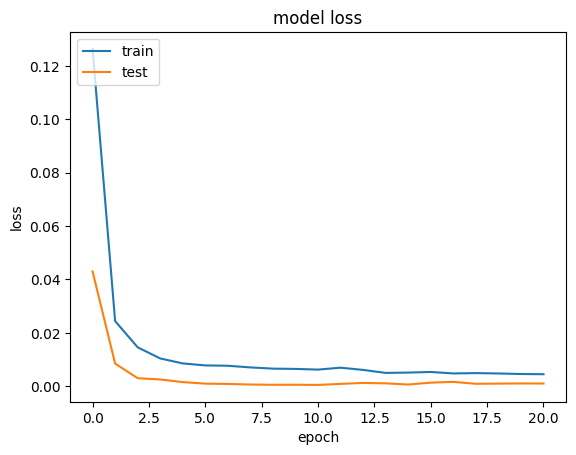

In [42]:
#Loss Graph

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

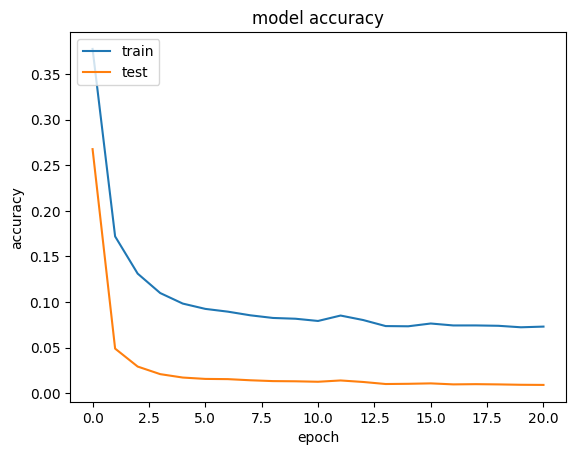

In [45]:
#Accuracy graph

plt.plot(model_history.history['mae'])
plt.plot(model_history.history['mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [63]:
y_pred = model.predict(x_test)
# y_pred = (y_pred >= 0.5)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


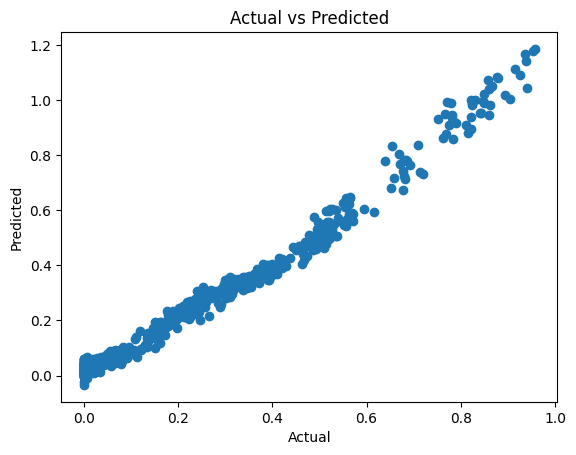

In [64]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [65]:
#making r2 matrix  and calculate loss

from sklearn.metrics import r2_score

loss = model.evaluate(x_test, y_test)
print("Loss : " ,loss)

r2_score_ann = r2_score(y_test, y_pred)
print("R2 Score (ANN) : " ,r2_score_ann)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - mae: 0.0296 - mse: 0.0021
Loss :  [0.0009808045579120517, 0.029247364029288292, 0.0019616091158241034]
R2 Score (ANN) :  0.9616637690013533


In [66]:
#saving model to drive

model.save('/content/drive/MyDrive/Trained Models/ANN_bitcoin_Price_Prediction_model.h5')

#Random forest model

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators and random_state

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(x_test)

In [54]:
r2_score2 = r2_score(y_test, y_pred_rf)
print("R2 Score : " ,r2_score2)

R2 Score :  0.998326426161705


#Decision Forest Model

In [ ]:
!pip install tensorflow_decision_forests

In [59]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf

# Define the input features
# TensorFlow Decision Forests can handle various input types automatically,
# but it's good practice to define them explicitly.
# We'll use the feature columns defined previously

# Combine features and target back into a single DataFrame for training and testing
train_df = x_train.copy()
train_df['target'] = y_train.copy()

test_df = x_test.copy()
test_df['target'] = y_test.copy()


# Create a TensorFlow Dataset from your pandas DataFrame
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='target', task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='target', task=tfdf.keras.Task.REGRESSION)


# Configure the Random Forest model
# You can adjust parameters like max_depth, num_trees, etc.
rf_tf_model = tfdf.keras.RandomForestModel(num_trees=100, random_seed=42, task=tfdf.keras.Task.REGRESSION)

# Train the model
rf_tf_model.fit(train_ds)

# Evaluate the model
evaluation = rf_tf_model.evaluate(test_ds, return_dict=True)

print(f"Loss: {evaluation['loss']}")
# If you need MAE or MSE, you can calculate them manually after getting predictions
# y_pred_tf = rf_tf_model.predict(test_ds)
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# print(f"MAE: {mean_absolute_error(y_test, y_pred_tf)}")
# print(f"MSE: {mean_squared_error(y_test, y_pred_tf)}")

Use /tmp/tmp0tx8_bqx as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.294620. Found 3776 examples.
Training model...
Model trained in 0:00:01.411916
Compiling model...
Model compiled.
1/1 [==============================] - 0s 97ms/step - loss: 0.0000e+00
Loss: 0.0


In [60]:
accuracy = 1-evaluation['loss']
print("Accuracy : " ,accuracy)

Accuracy :  1.0


In [61]:
# Create a sample unseen data point (replace with your actual unseen data)
# Using the mean values of the features as an example
unseen_data = x_test.mean().to_frame().T

# Convert the unseen data to a TensorFlow Dataset
unseen_ds = tfdf.keras.pd_dataframe_to_tf_dataset(unseen_data, task=tfdf.keras.Task.REGRESSION)

# Make a prediction using the trained model
prediction = rf_tf_model.predict(unseen_ds)

print(f"Prediction for the unseen data point: {prediction[0][0]}")

1/1 [==============================] - 0s 69ms/step
Prediction for the unseen data point: 0.17104186117649078


In [62]:
# Extract the specific data point from x_test using its timestamp
data_point_timestamp = pd.to_datetime('2021-08-17')
unseen_data_point = x_test.loc[[data_point_timestamp]]

# Convert the data point to a TensorFlow Dataset
unseen_ds_point = tfdf.keras.pd_dataframe_to_tf_dataset(unseen_data_point, task=tfdf.keras.Task.REGRESSION)

# Make a prediction using the trained TensorFlow Decision Forest model
prediction_point = rf_tf_model.predict(unseen_ds_point)

print(f"Predicted Close value for {data_point_timestamp}: {prediction_point[0][0]}")

# You can compare this to the actual scaled Close value in y_test
actual_close_point = y_test.loc[data_point_timestamp]
print(f"Actual scaled Close value for {data_point_timestamp}: {actual_close_point}")

1/1 [==============================] - 0s 51ms/step
Predicted Close value for 2021-08-17 00:00:00: 0.37359413504600525
Actual scaled Close value for 2021-08-17 00:00:00: 0.3678137248900703
